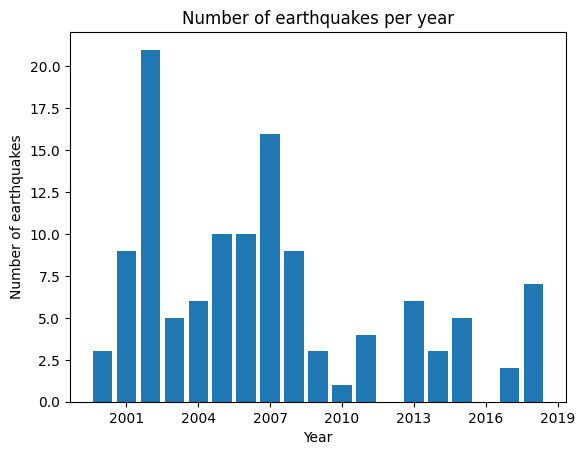

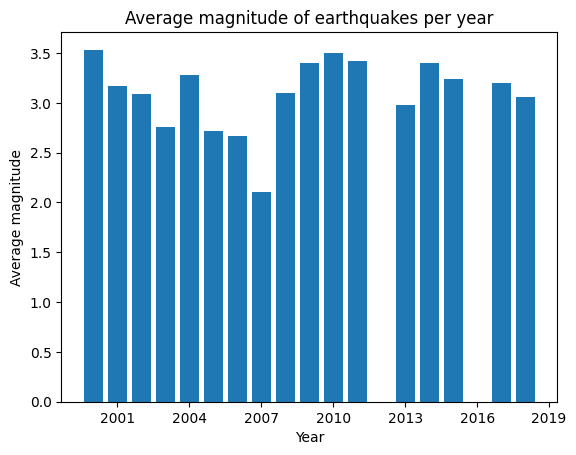

In [2]:
import json
from datetime import date

import matplotlib.pyplot as plt
import requests


def get_data():
    """Retrieve the data we will be working with."""
    response = requests.get(
        "http://earthquake.usgs.gov/fdsnws/event/1/query.geojson",
        params={
            'starttime': "2000-01-01",
            "maxlatitude": "58.723",
            "minlatitude": "50.008",
            "maxlongitude": "1.67",
            "minlongitude": "-9.756",
            "minmagnitude": "1",
            "endtime": "2018-10-11",
            "orderby": "time-asc"}
    )

    return json.loads(response.text)


def get_year(earthquake):
    """Extract the year in which an earthquake happened."""
    timestamp = earthquake['properties']['time']
    # The time is given in a strange-looking but commonly-used format.
    # To understand it, we can look at the documentation of the source data:
    # https://earthquake.usgs.gov/data/comcat/index.php#time
    # Fortunately, Python provides a way of interpreting this timestamp:
    # (Question for discussion: Why do we divide by 1000?)
    year = date.fromtimestamp(timestamp/1000).year
    return year


def get_magnitude(earthquake):
    """Retrieve the magnitude of an earthquake item."""
    return earthquake["properties"]["mag"]


# This is function you may want to create to break down the computations,
# although it is not necessary. You may also change it to something different.
def get_magnitudes_per_year(earthquakes):
    """Retrieve the magnitudes of all the earthquakes in a given year.

    Returns a dictionary with years as keys, and lists of magnitudes as values.
    """
    out = {}
    for q in earthquakes:
        year = get_year(q)
        magnitude = get_magnitude(q)
        if year not in out:
            out[year] = []
        out[year].append(magnitude)
    return out


def plot_average_magnitude_per_year(earthquakes):
    mags_by_year = get_magnitudes_per_year(quakes)
    fig, ax = plt.subplots()
    ax.set_xlabel("Year")
    ax.set_ylabel("Average magnitude")
    ax.set_title("Average magnitude of earthquakes per year")
    ax.bar(mags_by_year.keys(), [sum(magnitudes)/len(magnitudes) for magnitudes in mags_by_year.values()])
    # Make x axis labels integers
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))


def plot_number_per_year(earthquakes):
    mags_by_year = get_magnitudes_per_year(quakes)
    fig, ax = plt.subplots()
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of earthquakes")
    ax.set_title("Number of earthquakes per year")
    ax.bar(mags_by_year.keys(), [len(magnitudes) for magnitudes in mags_by_year.values()])
    # Make x axis labels integers
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))


# Get the data we will work with
quakes = get_data()['features']
# Plot the results - this is not perfect since the x axis is shown as real
# numbers rather than integers, which is what we would prefer!
plot_number_per_year(quakes)
plot_average_magnitude_per_year(quakes)